# Superstore Sales (Case Study)

In [64]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [65]:
#Data loading
file_path = './SuperStore_Dataset.csv'
data = pd.read_csv(file_path)

In [66]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
0,1,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2.0,0.00,41.9136
1,2,CA-2016-152156,08/11/16,11/11/16,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.00,219.5820
2,3,CA-2016-138688,12/06/16,16/06/16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.00,6.8714
3,4,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,0.45,-383.0310
4,5,US-2015-108966,11/10/15,18/10/15,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.20,2.5164


In [67]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', nan, 'Same Day'],
      dtype=object)

In [68]:
# Columns list
columns = data.columns

# All data types
data_types = data.dtypes

# Numeric value summary
summary_stats = data.describe(include='all')

#Unique values
unique_values = data.nunique()

#Missing values
missing_values = data.isnull().sum()

In [69]:
data.shape

(10014, 21)

In [70]:
data_types.head()

Row ID         int64
Order ID      object
Order Date    object
Ship Date     object
Ship Mode     object
dtype: object

In [71]:
unique_values.head()

Row ID        9994
Order ID      5009
Order Date    1240
Ship Date     1334
Ship Mode        4
dtype: int64

In [72]:
summary_stats.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
count,10014.000000,10014,10014,10014,9916,10014,10014,10014,10014,10014,...,10014.000000,10014,10014,10014,10014,10014,10014.000000,9996.000000,10014.00000,10014.000000
unique,NaN,5009,1240,1334,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,05/09/16,16/12/15,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,38,35,5908,37,37,5203,10014,917,...,NaN,3212,19,6037,1526,48,NaN,NaN,NaN,NaN
mean,4997.523367,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,55205.131616,NaN,NaN,NaN,NaN,NaN,230.038424,3.792517,0.15624,28.708317


In [73]:
missing_values[missing_values>0]

Ship Mode    98
Quantity     18
dtype: int64

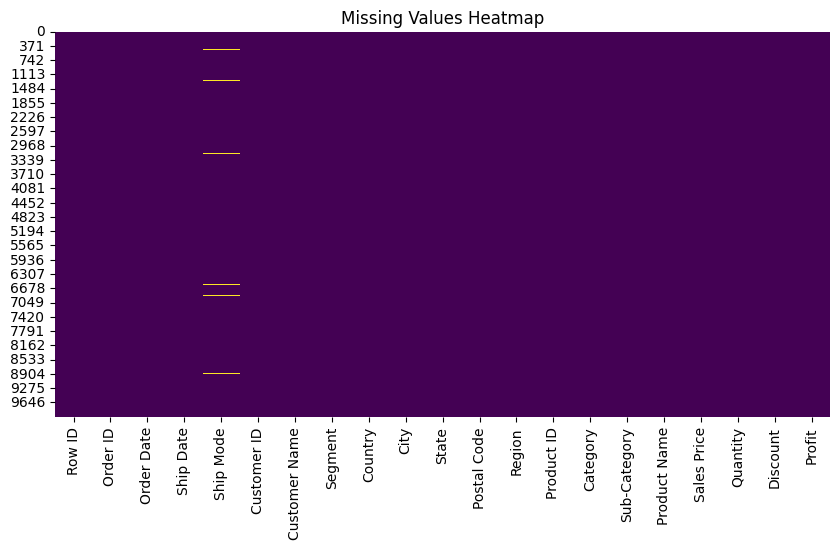

In [75]:
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap="viridis")
plt.title("Missing Values Heatmap")
plt.draw()

In [76]:

plt.clf()

<Figure size 640x480 with 0 Axes>

In [77]:
unique_values_unmelted = unique_values.to_frame().T
unique_values_unmelted.index = ['Unique Count'] 
unique_values_unmelted

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
Unique Count,9994,5009,1240,1334,4,793,793,3,1,531,...,631,4,1862,3,17,1850,5829,14,12,7287


##### 2. Handling  duplicates

*  Identify & remove duplicate rows in dataset
*  Document number of rows & distinct order ids impacted by this operation

In [78]:
#Identify Duplicates
duplicated_rows = data[data.duplicated(keep=False)]
duplicated_row_counts = len(duplicated_rows)
duplicate_order_ids = duplicated_rows['Order ID'].nunique()
duplicated_rows_sorted = duplicated_rows.sort_values(by='Order ID')

# Number of rows in original data and duplicate row counts
rows_before = data.shape[0]
num_duplicate_rows = duplicated_rows.shape[0]



print(f"Duplicate order id count: {duplicate_order_ids}")
duplicated_rows_sorted['Order ID'].value_counts().reset_index()

#Cleaned data
data_cleaned = data.drop_duplicates()
rows_after = data_cleaned.shape[0]
order_ids_before = data['Order ID'].nunique()
order_ids_after = data_cleaned['Order ID'].nunique()

duplicate_summary = {
    "Duplicate Rows Removed": num_duplicate_rows,
    "Rows Before": rows_before,
    "Rows After": rows_after,
    "Distinct Order IDs Before": order_ids_before,
    "Distinct Order IDs After": order_ids_after,
    "Affected Order IDs": duplicate_order_ids
}

print(f"Duplicate Order ID summary:\n{duplicate_summary}")
duplicated_rows_sorted.head()



Duplicate order id count: 12
Duplicate Order ID summary:
{'Duplicate Rows Removed': 34, 'Rows Before': 10014, 'Rows After': 9997, 'Distinct Order IDs Before': 5009, 'Distinct Order IDs After': 5009, 'Affected Order IDs': 12}


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit
10001,8853,CA-2014-119977,08/10/14,2014-10-13,Second Class,DN-13690,Duane Noonan,Consumer,United States,New York City,...,10011,East,OFF-PA-10003823,Office Supplies,Paper,Xerox 197,123.920,4.0,0.0,55.7640
8852,8853,CA-2014-119977,08/10/14,2014-10-13,Second Class,DN-13690,Duane Noonan,Consumer,United States,New York City,...,10011,East,OFF-PA-10003823,Office Supplies,Paper,Xerox 197,123.920,4.0,0.0,55.7640
10013,9616,CA-2014-128524,11/11/14,2014-11-13,First Class,MZ-17515,Mary Zewe,Corporate,United States,Seattle,...,98115,West,OFF-BI-10003527,Office Supplies,Binders,Fellowes PB500 Electric Punch Plastic Comb Bin...,2033.584,2.0,0.2,762.5940
10011,9614,CA-2014-128524,11/11/14,2014-11-13,First Class,MZ-17515,Mary Zewe,Corporate,United States,Seattle,...,98115,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,22.980,1.0,0.0,6.8940
10012,9615,CA-2014-128524,11/11/14,2014-11-13,First Class,MZ-17515,Mary Zewe,Corporate,United States,Seattle,...,98115,West,TEC-AC-10002718,Technology,Accessories,Belkin Standard 104 key USB Keyboard,102.130,7.0,0.0,15.3195


In [79]:

duplicated_rows.shape


(34, 21)

In [80]:
order_id_counts = data['Order ID'].value_counts()
#Top 10 duplicate order ids
order_id_couns_df = order_id_counts.to_frame().reset_index()
order_id_couns_df.columns = ['Order ID','Duplicate Count(s)']
order_id_couns_df.head(10)

,Order ID,Duplicate Count(s)
0,CA-2017-100111,14
1,CA-2017-157987,12
2,US-2016-108504,11
3,CA-2016-165330,11
4,CA-2016-105732,10
5,US-2015-126977,10
6,CA-2015-131338,10
7,CA-2014-106439,9
8,US-2015-163433,9
9,CA-2017-140949,9


C:\Users\Harsh\AppData\Local\Temp\ipykernel_33740\2779885757.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0, 0.5, 'Order ID')

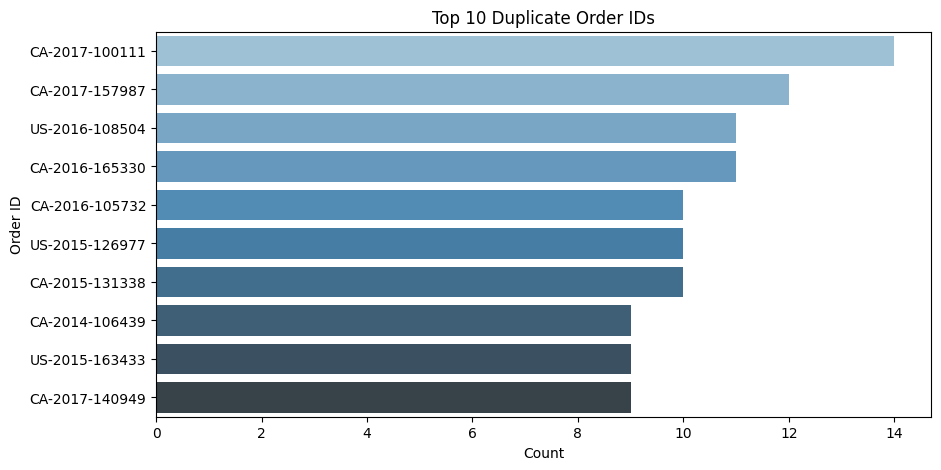

In [81]:

top_duplicates = order_id_counts[order_id_counts > 1].head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x=top_duplicates.values, y=top_duplicates.index, palette="Blues_d")
plt.title("Top 10 Duplicate Order IDs")
plt.xlabel("Count")
plt.ylabel("Order ID")

##### 3: Date Handling

In [82]:
# 3: Date Handling

# Copy the cleaned DataFrame from earlier steps
data_copy_step_3 = data_cleaned.copy()

# Store rows and Order IDs before processing for tracking
rows_before = data_copy_step_3.shape[0]
order_ids_before = data_copy_step_3['Order ID'].nunique()

# datetime conversion
data_copy_step_3['Order Date'] = pd.to_datetime(data_copy_step_3['Order Date'], errors='coerce', dayfirst=True)
data_copy_step_3['Ship Date'] = pd.to_datetime(data_copy_step_3['Ship Date'], errors='coerce', dayfirst=True)

# extract year from Order ID 
# (considering format "XX-YYYY-XXXXX")
# XX: Two Digit State Code
# YYYY: Year
# XXXXX: Order ID
# Example: CA-2014-119977
data_copy_step_3['Order ID Year'] = data_copy_step_3['Order ID'].str.extract(r'-(\d{4})-').astype(float)

# 3. Compare with actual Order Date year
data_copy_step_3['Order Date Year'] = data_copy_step_3['Order Date'].dt.year

# 4. Identify mismatches
year_mismatch_rows = data_copy_step_3[data_copy_step_3['Order ID Year'] != data_copy_step_3['Order Date Year']]
affected_rows = year_mismatch_rows.shape[0]
affected_order_ids = year_mismatch_rows['Order ID'].nunique()

# 5. Correct the mismatches by aligning Order Date year with Order ID year
data_copy_step_3.loc[data_copy_step_3['Order ID Year'] != data_copy_step_3['Order Date Year'], 'Order Date'] = \
    data_copy_step_3.loc[data_copy_step_3['Order ID Year'] != data_copy_step_3['Order Date Year'], 'Order Date'].apply(
        lambda dt: dt.replace(year=int(data_copy_step_3.loc[data_copy_step_3['Order ID Year'] != data_copy_step_3['Order Date Year'], 'Order ID Year'].mode()[0]))
        if pd.notnull(dt) else dt
    )

# Update the Order Date Year for consistency
data_copy_step_3['Order Date Year'] = data_copy_step_3['Order Date'].dt.year

#For plotting
plot_data_step3 = data_copy_step_3.copy()

# Clean up helper columns after use
data_copy_step_3.drop(columns=['Order ID Year'], inplace=True)

# Summarize impact
date_handling_summary = {
    "Rows Processed": rows_before,
    "Distinct Order IDs Before": order_ids_before,
    "Rows Affected by Year Fix": affected_rows,
    "Distinct Order IDs Affected": affected_order_ids
}

date_handling_summary

C:\Users\Harsh\AppData\Local\Temp\ipykernel_33740\3606948875.py:11: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

C:\Users\Harsh\AppData\Local\Temp\ipykernel_33740\3606948875.py:12: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



{'Rows Processed': 9997,
 'Distinct Order IDs Before': 5009,
 'Rows Affected by Year Fix': 40,
 'Distinct Order IDs Affected': 16}

In [83]:
year_df = plot_data_step3.copy()
year_df['Year Match'] = np.where(year_df['Order ID Year'] == year_df['Order Date Year'], 'Match', 'Mismatch')

In [84]:
year_df[year_df['Year Match']=='Mismatch']

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales Price,Quantity,Discount,Profit,Order ID Year,Order Date Year,Year Match
1152,1153,CA-2017-160395,2015-12-31,2017-01-06,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,...,Office Supplies,Art,"Crayola Anti Dust Chalk, 12/Pack",3.640,2.0,0.0,1.6380,2017.0,2015,Mismatch
1153,1154,CA-2017-160395,2015-12-31,2017-01-06,Standard Class,KL-16555,Kelly Lampkin,Corporate,United States,Reno,...,Office Supplies,Binders,Lock-Up Easel 'Spel-Binder',159.768,7.0,0.2,53.9217,2017.0,2015,Mismatch
2821,2822,CA-2017-100202,2015-12-31,2017-01-05,Standard Class,BD-11620,Brian DeCherney,Consumer,United States,Anaheim,...,Technology,Phones,Adtran 1202752G1,302.376,3.0,0.2,22.6782,2017.0,2015,Mismatch
3537,3538,CA-2014-158771,2015-05-09,2014-05-09,Same Day,SB-20290,Sean Braxton,Corporate,United States,Henderson,...,Office Supplies,Storage,Fellowes Super Stor/Drawer,83.250,3.0,0.0,14.9850,2014.0,2015,Mismatch
3538,3539,CA-2014-158771,2015-05-09,2014-05-09,Same Day,SB-20290,Sean Braxton,Corporate,United States,Henderson,...,Office Supplies,Labels,Avery 518,9.450,3.0,0.0,4.5360,2014.0,2015,Mismatch
3539,3540,CA-2014-158771,2015-05-09,2014-05-09,Same Day,SB-20290,Sean Braxton,Corporate,United States,Henderson,...,Office Supplies,Labels,Avery 506,20.650,5.0,0.0,9.4990,2014.0,2015,Mismatch
3540,3541,CA-2014-158771,2015-05-09,2014-05-09,Same Day,SB-20290,Sean Braxton,Corporate,United States,Henderson,...,Office Supplies,Paper,Weyerhaeuser First Choice Laser/Copy Paper (20...,45.360,7.0,0.0,21.7728,2014.0,2015,Mismatch
4612,4613,US-2017-165953,2015-12-31,2017-01-06,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,...,Office Supplies,Art,Newell 345,47.616,3.0,0.2,3.5712,2017.0,2015,Mismatch
4613,4614,US-2017-165953,2015-12-31,2017-01-06,Standard Class,EP-13915,Emily Phan,Consumer,United States,Jacksonville,...,Office Supplies,Paper,Things To Do Today Pad,23.480,5.0,0.2,8.2180,2017.0,2015,Mismatch
5289,5290,CA-2014-146283,2015-09-08,2014-09-15,Standard Class,KT-16465,Kean Takahito,Consumer,United States,Houston,...,Office Supplies,Paper,"Geographics Note Cards, Blank, White, 8 1/2"" x...",17.904,2.0,0.2,6.2664,2014.0,2015,Mismatch


C:\Users\Harsh\AppData\Local\Temp\ipykernel_33740\560380587.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Order ID Year vs Order Date Year Match')

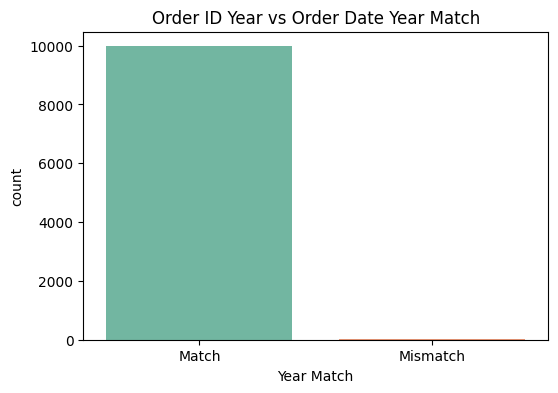

In [85]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Year Match', data=year_df, palette='Set2')
plt.title("Order ID Year vs Order Date Year Match")

<Axes: title={'center': 'Order Volume Over Time'}, xlabel='Order Date', ylabel='Number of Orders'>

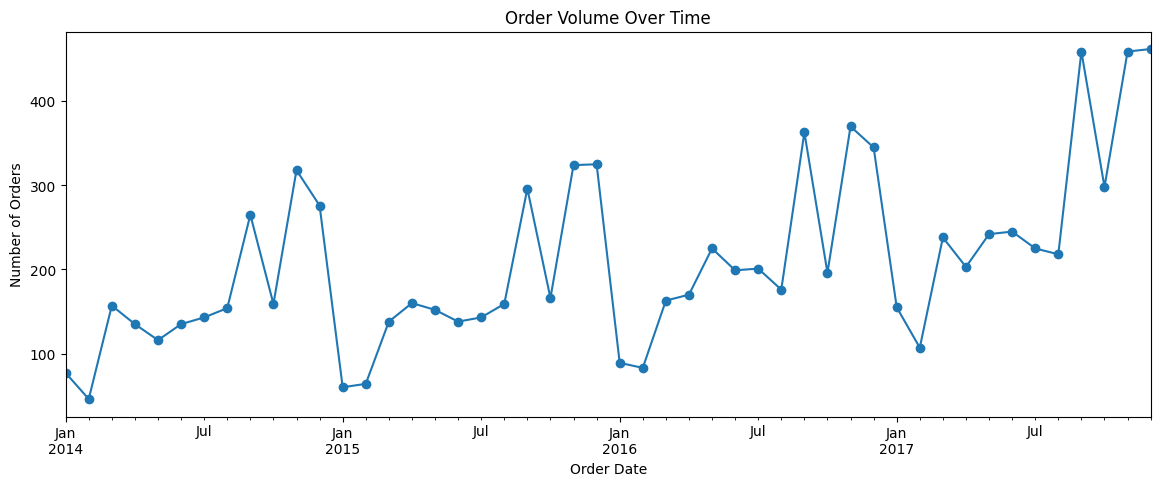

In [86]:
monthly_orders = plot_data_step3['Order Date'].dt.to_period('M').value_counts().sort_index()
plt.figure(figsize=(14, 5))
plt.title("Order Volume Over Time")
plt.ylabel("Number of Orders")
plt.xlabel("Order Month")
monthly_orders.plot(kind='line', marker='o')

In [87]:
# Step 4: 
data_step4 = data_copy_step_3.copy()
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 3 * IQR
    upper = Q3 + 3 * IQR
    return df[(df[col] >= lower) & (df[col] <= upper)]

# Calculate Days to Ship
data_step4['Days to Ship'] = (data_step4['Ship Date'] - data_step4['Order Date']).dt.days

# Impute Ship Mode using Days to Ship
data_step4['Ship Mode'] = data_step4['Ship Mode'].fillna(
    data_step4['Days to Ship'].map({0: 'Same Day', 7: 'Standard Class'})
)

# Convert to numeric safely (non-numeric values → NaN)
data_step4['Quantity'] = pd.to_numeric(data_step4['Quantity'], errors='coerce')

#Count invalid entries
print("Before filling:")
print(data_step4['Quantity'].isna().sum(), "NaNs in Quantity")
print(data_step4['Quantity'].isin([float('inf'), float('-inf')]).sum(), "Inf values")

# Remove infinite values explicitly
data_step4 = data_step4[~data_step4['Quantity'].isin([float('inf'), float('-inf')])]

# Fill NaNs with median
median_val = data_step4['Quantity'].median()
data_step4['Quantity'] = data_step4['Quantity'].fillna(median_val)

# Check again before casting
print("After filling:")
print(data_step4['Quantity'].isna().sum(), "NaNs remaining")

# Now convert to integer safely
data_step4['Quantity'] = data_step4['Quantity'].astype(int)


Before filling:
18 NaNs in Quantity
0 Inf values
After filling:
0 NaNs remaining


<Axes: title={'center': 'Quantity Distribution (Box Plot)'}, xlabel='Quantity'>

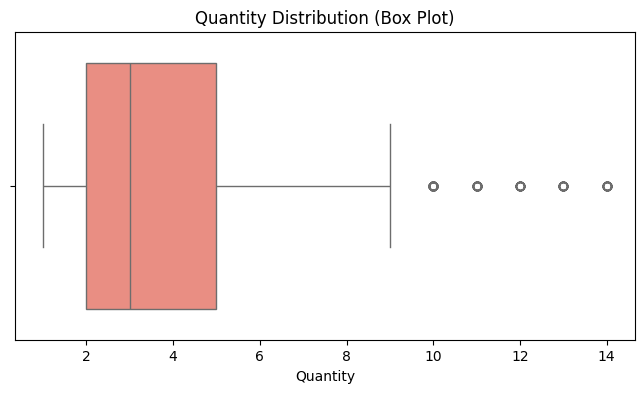

In [88]:
plt.figure(figsize=(8, 4))
plt.title("Quantity Distribution (Box Plot)")
sns.boxplot(x=data_step4['Quantity'].dropna(), color='salmon')

In [89]:
data_step4['Days to Ship'].max()
data_step4['Days to Ship'].min()

-365

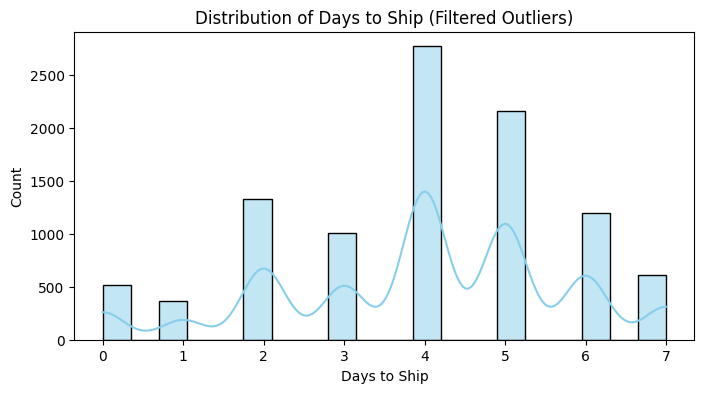

In [117]:
# Filter the data
from numpy import diff


filtered_data = remove_outliers(data_step4,'Days to Ship')
impacted_rows = rows_with_diff = data_step4[data_step4.ne(filtered_data).any(axis=1)]

impacted_rows.head()
filtered_days_to_ship = filtered_data['Days to Ship']

# Plot
plt.figure(figsize=(8, 4))
sns.histplot(filtered_days_to_ship, bins=20, kde=True, color='skyblue')
plt.title("Distribution of Days to Ship (Filtered Outliers)")
plt.xlabel("Days to Ship")
plt.ylabel("Count")
plt.show()


In [120]:

impacted_rows['Days to Ship']

1152    372
1153    372
2821    371
3537   -365
3538   -365
3539   -365
3540   -365
4612    372
4613    372
5289   -358
5290   -358
5291   -358
5738    372
6341    368
6387   -360
6388   -360
8586    738
8587    738
8595   -363
8596   -363
9942   -359
9943   -359
Name: Days to Ship, dtype: int64

In [115]:
print(len(data_step4) - len(filtered_data))

22


In [91]:
# Step 5: Mask customer name
data_masked_names = filtered_data.copy()
data_masked_names['Customer Name Masked'] = data_masked_names['Customer Name'].fillna("").apply(
    lambda name: '.'.join([n[0] for n in name.split() if n]) + '.' if name else ''
)
data_masked_names.drop(columns=['Customer Name'], inplace=True)


C:\Users\Harsh\AppData\Local\Temp\ipykernel_33740\1534995885.py:7: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




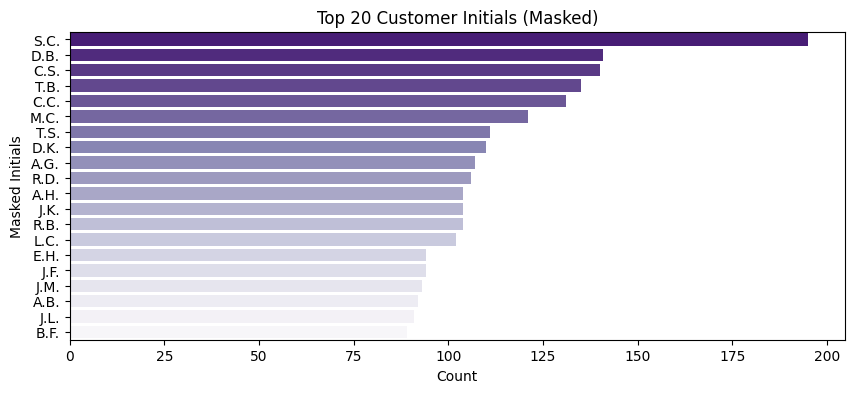

In [92]:
if 'Customer Name Masked' in data_masked_names.columns:
    initials_counts = data_masked_names['Customer Name Masked'].value_counts().head(20)
    plt.figure(figsize=(10, 4))
    plt.title("Top 20 Customer Initials (Masked)")
    plt.xlabel("Count")
    plt.ylabel("Masked Initials")
    sns.barplot(x=initials_counts.values, y=initials_counts.index, palette="Purples_r")


In [93]:
# Step 6: Data type conversion
date_converted_data = data_masked_names.copy()
date_converted_data['Postal Code'] = date_converted_data['Postal Code'].astype(str).str.zfill(5)
date_converted_data['Sales Price'] = pd.to_numeric(date_converted_data['Sales Price'], errors='coerce')
date_converted_data['Profit'] = pd.to_numeric(date_converted_data['Profit'], errors='coerce')

In [94]:
# Step 7: Replace state abbreviations
# used a standard csv instead of creating self gathered data for abbreviations
state_updated_data = date_converted_data.copy()
us_state_abbreviations = pd.read_csv('https://raw.githubusercontent.com/jasonong/List-of-US-States/master/states.csv')
us_state_abbreviations.head()

# Create mapping dictionary
state_abbrev_map = dict(zip(us_state_abbreviations['Abbreviation'], us_state_abbreviations['State']))

# Replace abbreviations in your dataset
state_updated_data['State'] = state_updated_data['State'].replace(state_abbrev_map)

C:\Users\Harsh\AppData\Local\Temp\ipykernel_33740\2960863023.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 0, 'Orders')

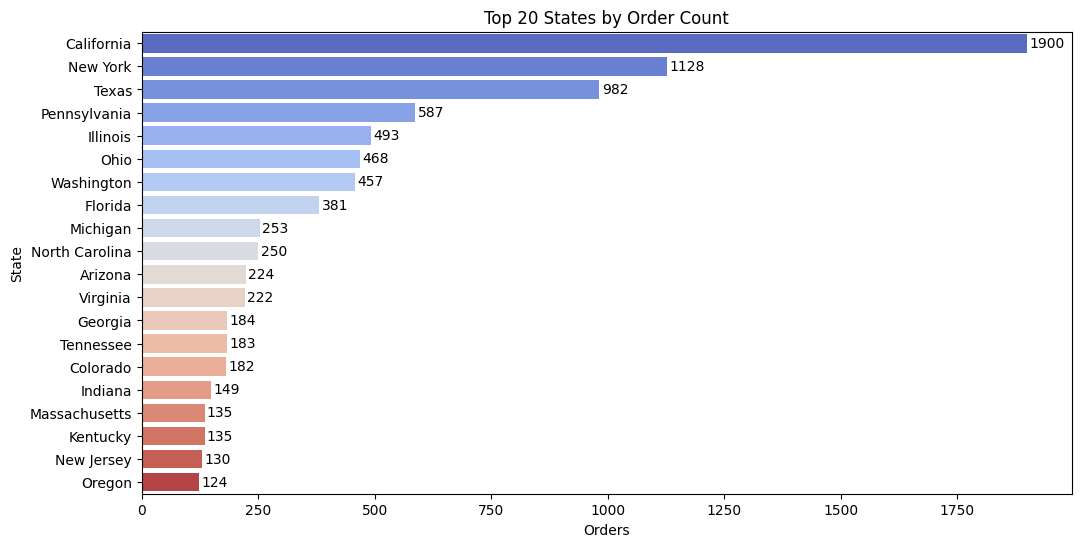

In [95]:
plt.figure(figsize=(12, 6))
state_counts = state_updated_data['State'].value_counts().head(20)
sns.barplot(y=state_counts.index, x=state_counts.values, palette="coolwarm")
for i, value in enumerate(state_counts.values):
    plt.text(value + 5, i, str(value), va='center')

plt.title("Top 20 States by Order Count")
plt.xlabel("Orders")

In [96]:
# Step 8: Feature engineering
features_data = state_updated_data.copy()
features_data['Original Price'] = features_data['Sales Price'] / (1 - features_data['Discount'].clip(upper=0.99))
features_data['Total Sales'] = features_data['Sales Price'] * features_data['Quantity']
features_data['Total Profit'] = features_data['Profit'] * features_data['Quantity']
features_data['Discount Price'] = features_data['Original Price'] - features_data['Sales Price']
features_data['Total Discount'] = features_data['Discount Price'] * features_data['Quantity']
features_data['Shipping Urgency'] = features_data['Days to Ship'].apply(
    lambda x: 'Immediate' if x == 0 else ('Urgent' if 1 <= x <= 3 else 'Standard')
)



C:\Users\Harsh\AppData\Local\Temp\ipykernel_33740\2280949598.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




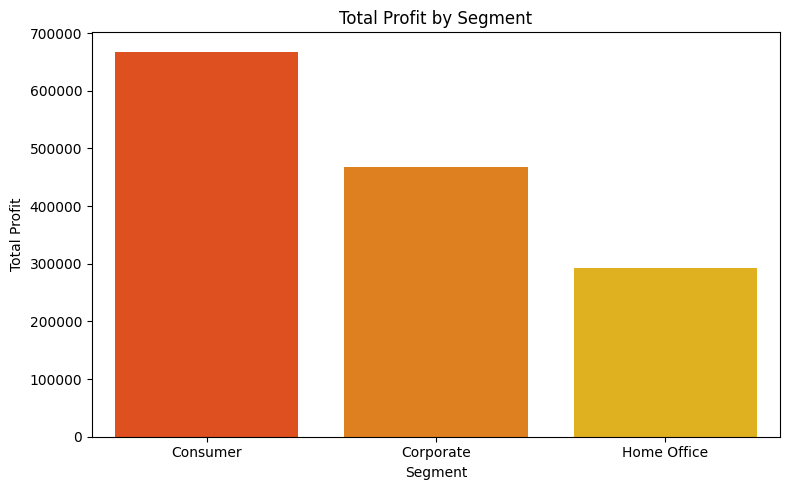

In [97]:
segment_profit = features_data.groupby('Segment')['Total Profit'].sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
sns.barplot(x=segment_profit.index, y=segment_profit.values, palette='autumn')
plt.title("Total Profit by Segment")
plt.xlabel("Segment")
plt.ylabel("Total Profit")
plt.tight_layout()
plt.show()

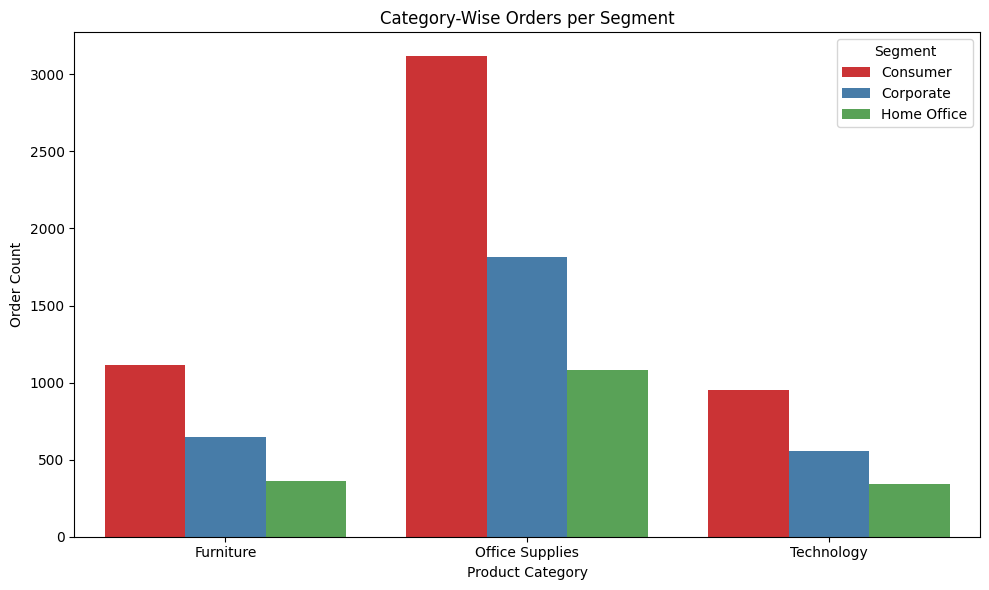

In [98]:
plt.figure(figsize=(10, 6))
sns.countplot(data=features_data, x='Category', hue='Segment', palette='Set1')
plt.title("Category-Wise Orders per Segment")
plt.xlabel("Product Category")
plt.ylabel("Order Count")
plt.tight_layout()
plt.show()

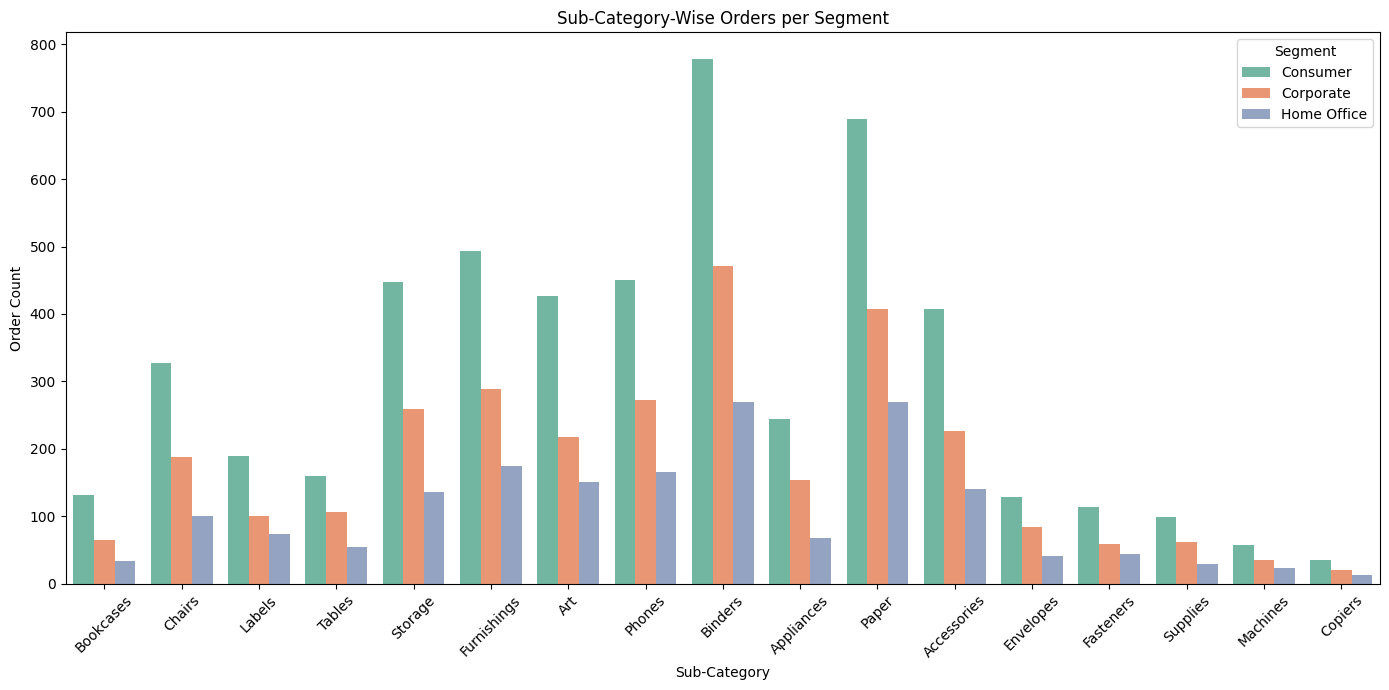

In [99]:
plt.figure(figsize=(14, 7))
sns.countplot(data=state_updated_data, x='Sub-Category', hue='Segment', palette='Set2')
plt.title("Sub-Category-Wise Orders per Segment")
plt.xlabel("Sub-Category")
plt.ylabel("Order Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

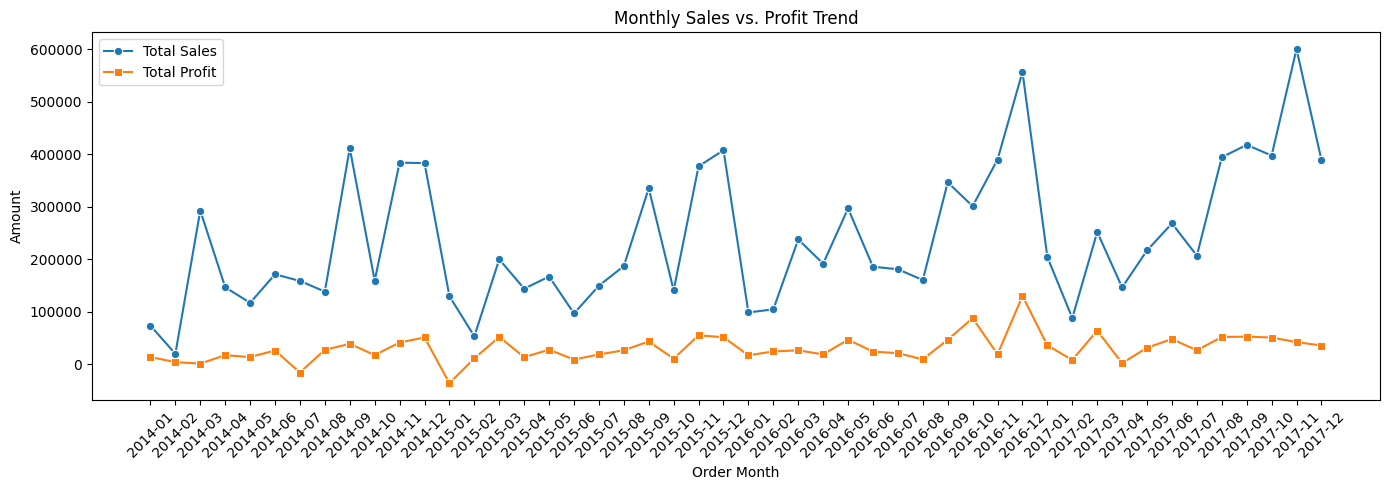

In [100]:
# Group by Order Month to get total sales and profit
features_data['Order Month'] = features_data['Order Date'].dt.to_period('M').astype(str)
monthly_metrics = features_data.groupby('Order Month')[['Total Sales', 'Total Profit']].sum().reset_index()

# Plot
plt.figure(figsize=(14, 5))
plt.title("Monthly Sales vs. Profit Trend")
sns.lineplot(data=monthly_metrics, x='Order Month', y='Total Sales', marker='o', label='Total Sales')
sns.lineplot(data=monthly_metrics, x='Order Month', y='Total Profit', marker='s', label='Total Profit')
plt.xlabel("Order Month")
plt.ylabel("Amount")
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()

C:\Users\Harsh\AppData\Local\Temp\ipykernel_33740\3515719972.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Shipping Urgency Distribution')

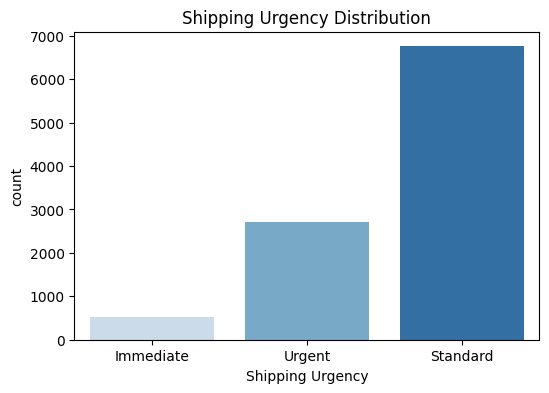

In [101]:
plt.figure(figsize=(6, 4))
sns.countplot(data=features_data, x='Shipping Urgency', order=['Immediate', 'Urgent', 'Standard'], palette='Blues')
plt.title("Shipping Urgency Distribution")


In [102]:
# Step 9: Outlier removal using 3*IQR
iqr_data = remove_outliers(features_data, 'Sales Price')
iqr_data = remove_outliers(features_data, 'Profit')


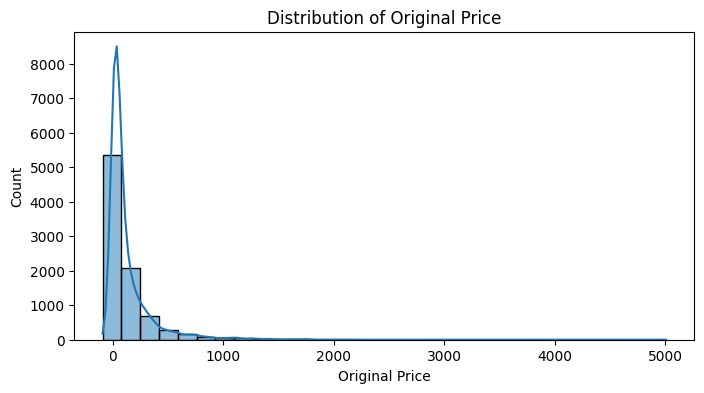

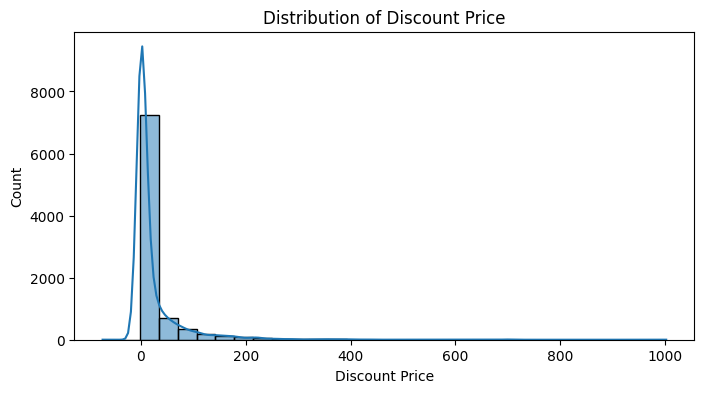

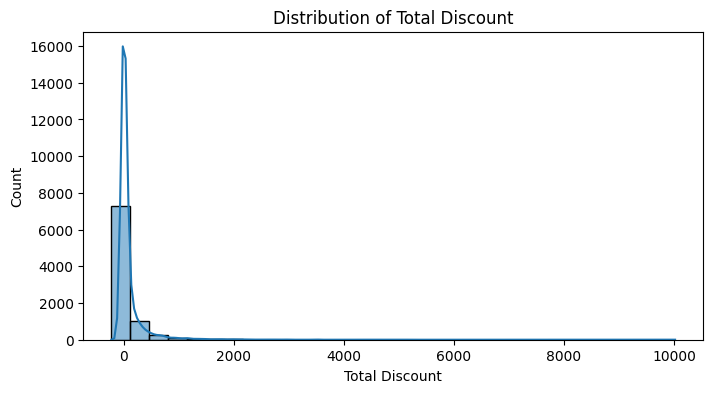

In [103]:
for col in ['Original Price', 'Discount Price', 'Total Discount']:
    plt.figure(figsize=(8, 4))
    sns.histplot(iqr_data[col].dropna(), bins=30, kde=True)
    plt.title(f"Distribution of {col}")

In [104]:
# Step 10: Customer segmentation
customer_summary = iqr_data.groupby('Customer ID').agg({
    'Total Sales': 'sum',
    'Total Profit': 'sum'
}).reset_index()
customer_summary['Sales Quintile'] = pd.qcut(customer_summary['Total Sales'], 5, labels=[1, 2, 3, 4, 5])
customer_summary['Profit Quintile'] = pd.qcut(customer_summary['Total Profit'], 5, labels=[1, 2, 3, 4, 5])
segmented_data = iqr_data.merge(customer_summary[['Customer ID', 'Sales Quintile', 'Profit Quintile']], on='Customer ID', how='left')


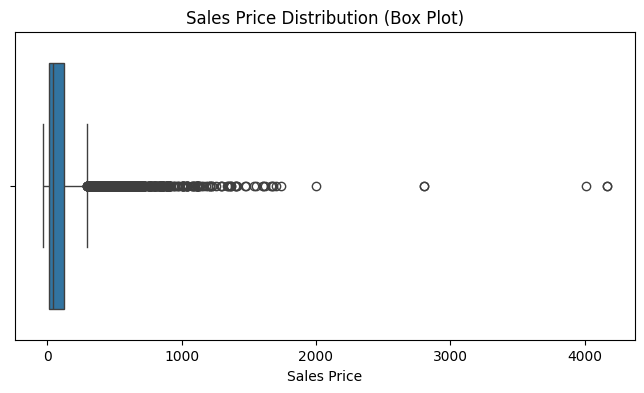

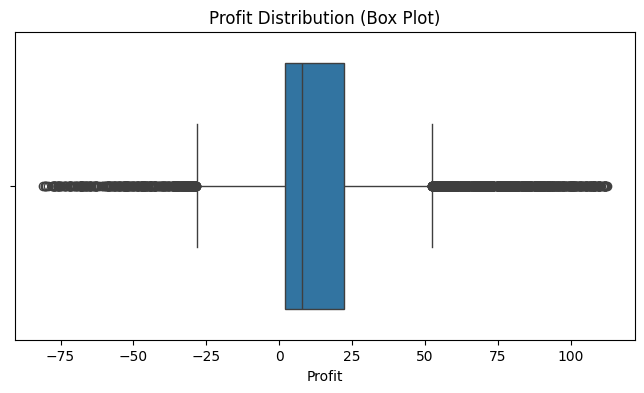

In [105]:
for col in ['Sales Price', 'Profit']:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=segmented_data[col].dropna())
    plt.title(f"{col} Distribution (Box Plot)")

Text(0.5, 1.0, 'Customer Segmentation: Sales vs. Profit Quintile')

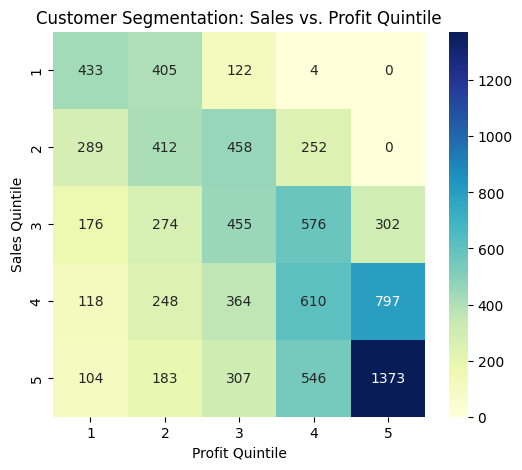

In [106]:
pivot_quintiles = pd.crosstab(segmented_data['Sales Quintile'], segmented_data['Profit Quintile'])
plt.figure(figsize=(6, 5))
sns.heatmap(pivot_quintiles, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Customer Segmentation: Sales vs. Profit Quintile")

C:\Users\Harsh\AppData\Local\Temp\ipykernel_33740\3373472451.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Top 10 Most Profitable Products'}, ylabel='Product Name'>

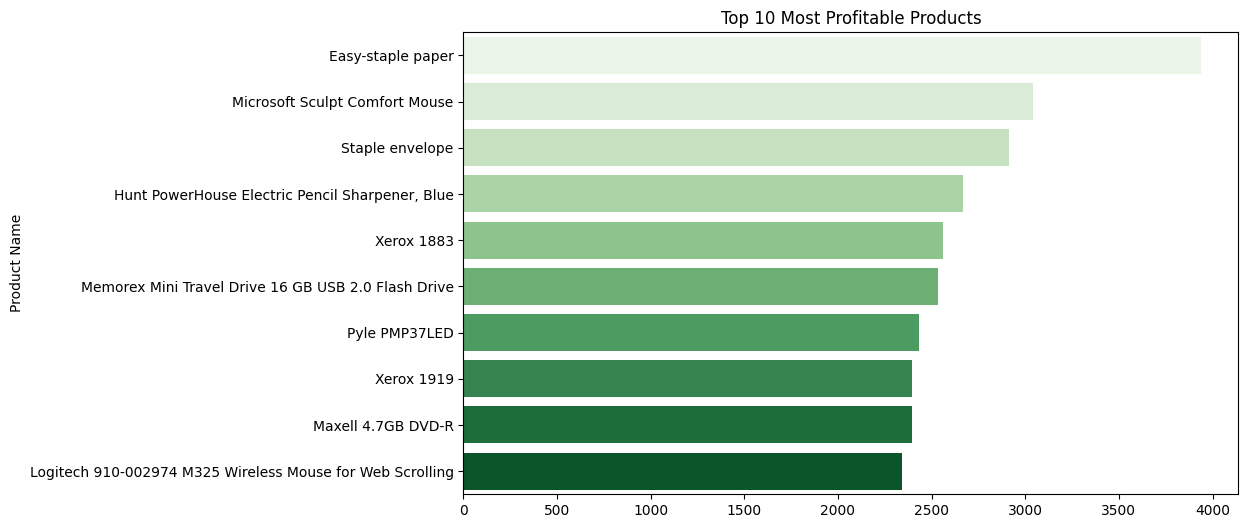

In [107]:
#Step 11: Top 10 Profitable Products
top_profit = segmented_data.groupby('Product Name')['Total Profit'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.title("Top 10 Most Profitable Products")
sns.barplot(x=top_profit.values, y=top_profit.index, palette="Greens")


C:\Users\Harsh\AppData\Local\Temp\ipykernel_33740\1083800267.py:4: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




<Axes: title={'center': 'Top 10 Most Loss-Making Products'}, ylabel='Product Name'>

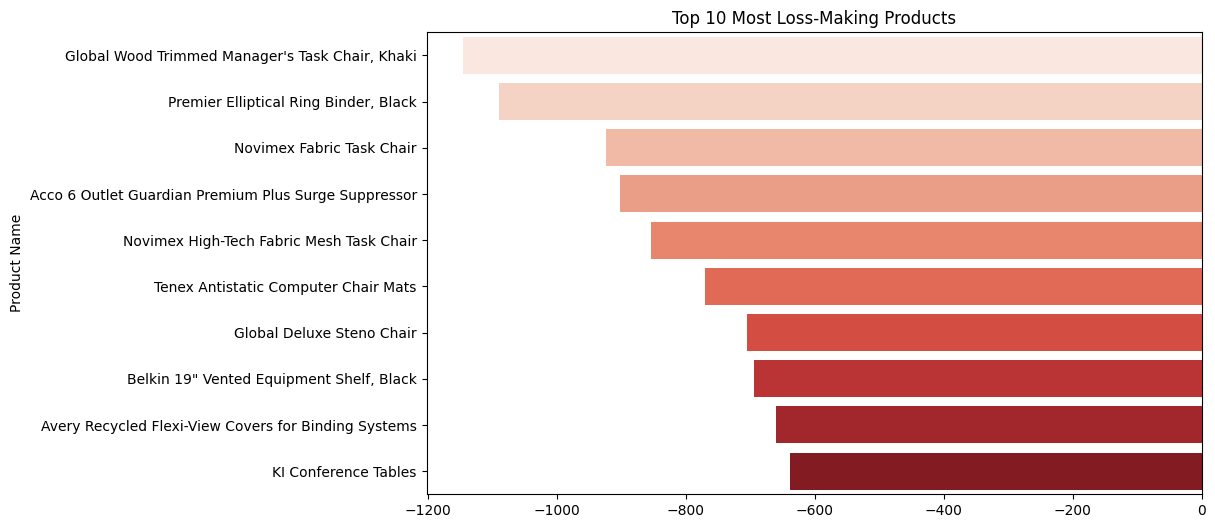

In [108]:
bottom_profit = segmented_data.groupby('Product Name')['Total Profit'].sum().sort_values().head(10)
plt.figure(figsize=(10, 6))
plt.title("Top 10 Most Loss-Making Products")
sns.barplot(x=bottom_profit.values, y=bottom_profit.index, palette="Reds")

Text(0.5, 1.0, 'Total Sales vs. Total Profit')

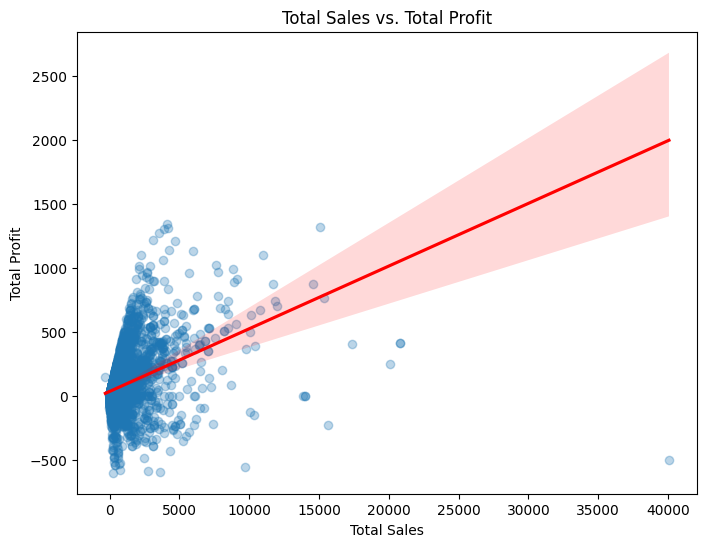

In [109]:
plt.figure(figsize=(8, 6))
sns.regplot(x='Total Sales', y='Total Profit', data=segmented_data, scatter_kws={'alpha':0.3}, line_kws={'color': 'red'})
plt.title("Total Sales vs. Total Profit")

Text(0.5, 1.0, 'Days to Ship vs Profit Distribution')

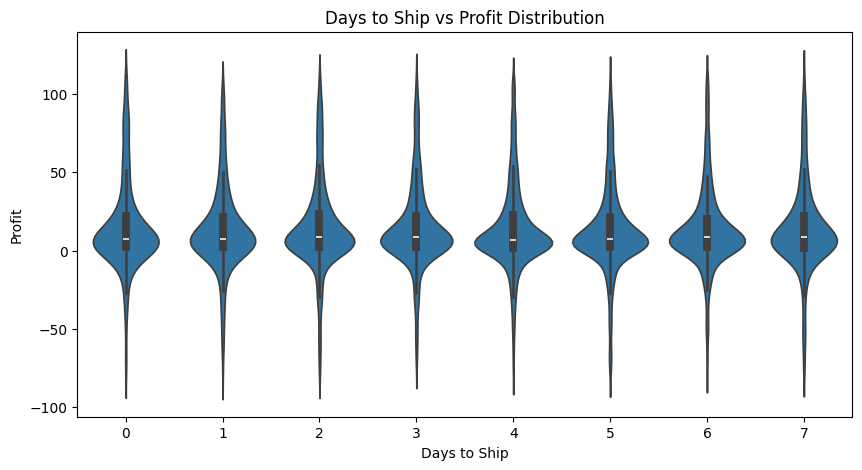

In [110]:
plt.figure(figsize=(10, 5))
sns.violinplot(data=segmented_data, x='Days to Ship', y='Profit')
plt.title("Days to Ship vs Profit Distribution")

C:\Users\Harsh\AppData\Local\Temp\ipykernel_33740\2862983377.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




Text(0.5, 1.0, 'Total Profit by Region')

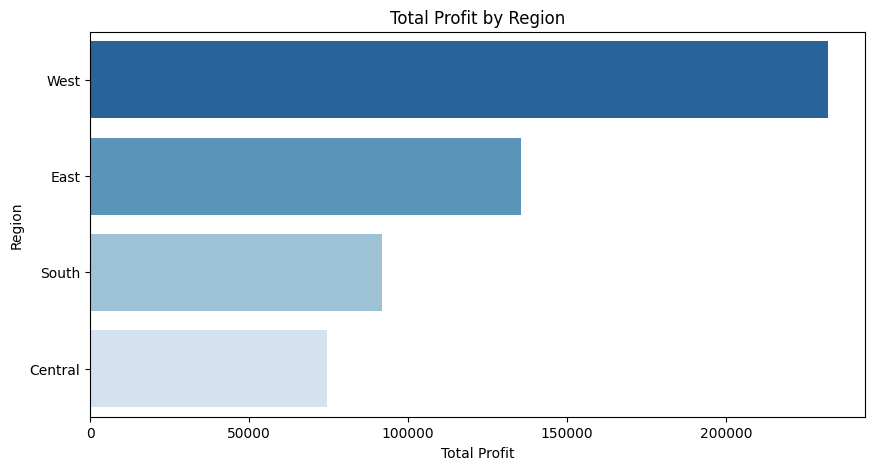

In [111]:
# Region-wise Profit Analysis
region_profit = segmented_data.groupby('Region')['Total Profit'].sum().reset_index().sort_values(by='Total Profit', ascending=False)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(data=region_profit, y='Region', x='Total Profit', ax=ax, palette='Blues_r')
ax.set_title("Total Profit by Region")

C:\Users\Harsh\AppData\Local\Temp\ipykernel_33740\1170338029.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




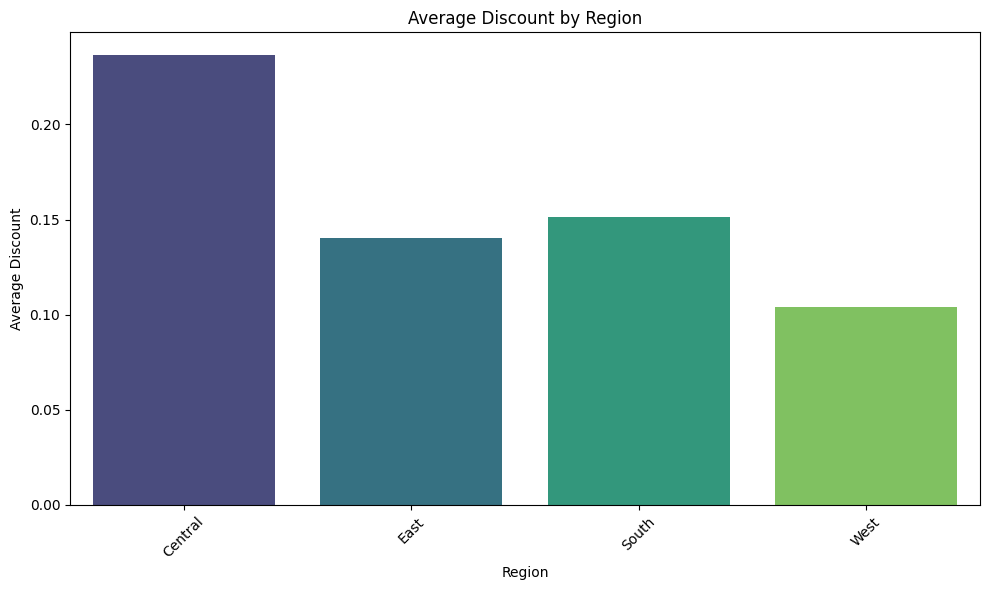

In [112]:
discount_by_region = segmented_data.groupby('Region')['Discount'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='Region', y='Discount', data=discount_by_region, palette='viridis')
plt.title('Average Discount by Region')
plt.ylabel('Average Discount')
plt.xlabel('Region')
plt.xticks(rotation=45)
plt.tight_layout()

In [113]:
# Save final dataset
final_path = "./SuperStore_Cleaned_Final.csv"
segmented_data.to_csv(final_path, index=False)

final_path

'./SuperStore_Cleaned_Final.csv'

In [114]:
#TODO: Perform later to check and prove a hypothesis that decline is 
#      profit is due to increase in discounts (possibly a one tail test)
# import copy
# from scipy.stats import f_oneway
# anova_results = {}

# q1 = segmented_data['Profit'].quantile(0.25)
# q3 = segmented_data['Profit'].quantile(0.75)
# iqr = q3 - q1
# lower_bound = q1 - 3 * iqr
# upper_bound = q3 + 3 * iqr
# stats_test_data = segmented_data[(segmented_data['Profit'] >= lower_bound) & (segmented_data['Profit'] <= upper_bound)].copy()

# for region in stats_test_data['Region'].unique():
#     region_df = stats_test_data[stats_test_data['Region'] == region]
#     groups = [g['Profit'].values for _, g in region_df.groupby('Discount Bin')]
    
#     # Only perform ANOVA if there are more than 1 group with data
#     if len(groups) >= 2 and all(len(g) > 1 for g in groups):
#         f_stat, p_val = f_oneway(*groups)
#         anova_results[region] = {'F-statistic': f_stat, 'p-value': p_val}
#     else:
#         anova_results[region] = {'F-statistic': None, 'p-value': None}